# 데이터 로드

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
train = pd.read_csv('data/train.csv')
train_label = pd.read_csv('data/train_label.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

# 데이터 병합

In [3]:
train_merge = pd.merge(train, train_label, left_on='EMAIL', right_on='SAMPLE_EMAIL')
train_merge.drop('SAMPLE_EMAIL', axis=1, inplace=True)
train_merge.head()

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_1min,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,sleep_hr_lowest,sleep_hypnogram_5min,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_rmssd_5min,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,timezone,sleep_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8),CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8),DIAG_NM
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,...,14346,0,417,0,545,47,...,0,7,432,160,32,399,96,95,100,100,86,100,98,15867,592,13950,16.500,2100,35460,61,...,70.53,62,...,1,15030,6693,17280,960,0,4380,47,20,...,62,100,41,50,27,97,66,62,-0.12,-0.12,99.99,NaN,\r,2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...,0.9/0.9/1.4/1.9/1.1/0.9/0.9/1.1/1.3/1/0.9/1.1/...,0/73/73/73/72/71/70/71/71/71/70/70/73/72/74/74...,4/2/4/3/3/1/2/2/2/2/2/2/3/3/3/4/4/3/2/2/2/2/2/...,0/10/10/10/11/11/10/12/18/13/14/12/10/10/18/17...,CN
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,...,6352,0,473,0,392,8,...,0,8,249,24,29,538,91,78,100,100,83,100,97,7755,400,7680,17.375,2430,24720,69,...,68.01,63,...,1,12210,10495,11490,690,0,2400,56,19,...,54,100,49,43,46,91,35,44,-0.32,-0.32,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...,1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,69/70/69/69/70/72/71/72/70/69/69/69/68/68/63/6...,2/4/2/2/2/2/3/1/2/2/4/4/2/2/2/2/2/2/2/2/2/2/4/...,23/23/26/24/18/13/15/14/17/20/24/30/23/25/22/1...,CN
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,...,7297,0,586,0,362,24,...,0,14,240,76,9,459,93,95,100,100,71,96,96,8341,386,11880,17.000,2820,33240,64,...,64.89,59,...,1,15780,5439,17460,1140,0,2760,48,26,...,61,100,56,47,34,89,41,62,0.07,0.07,99.99,NaN,\r,1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...,1.1/1.1/1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/74/73/73/74/74/74/71/71/70/70/69/70/68/66/69...,4/2/4/4/1/1/1/4/4/4/4/4/4/4/2/3/4/2/2/4/2/2/2/...,0/11/14/20/13/14/14/16/27/29/27/20/19/19/14/12...,CN
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,...,491,0,176,0,34,1,...,0,1,18,3,19,1210,93,95,100,100,74,96,92,8122,35,9600,17.250,1770,29700,68,...,63.70,57,...,1,16350,7241,15750,1170,0,1980,59,30,...,55,100,35,40,44,86,29,56,-0.41,-0.41,99.99,NaN,\r,2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...,0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...,73/70/71/72/75/75/73/70/70/70/67/63/63/63/63/6...,4/4/4/4/3/3/3/2/4/4/4/2/2/2/2/2/2/2/2/4/2/2/2/...,24/28/19/17/12/10/17/20/23/23/25/31/26/25/34/3...,CN
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,...,5861,0,646,0,377,6,...,0,15,240,19,19,392,88,95,100,100,65,71,80,7378,383,10710,17.250,3150,31440,66,...,67.07,60,...,1,14010,6037,17220,3360,0,3570,42,23,...,56,100,64,55,39,14,54,59,-0.27,-0.27,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/0/0/0/0/0/0/0/69/69/71/69/65/66/64/64/65/66/...,4/4/4/4/4/4/4/4/4/4/4/2/2/2/2/3/3/2/4/4/4/2/2/...,0/0/0/0/0/0/0/0/21/22/26/23/19/29/22/17/14/13/...,CN


# 데이터 탐색

<AxesSubplot:xlabel='activity_average_met', ylabel='activity_cal_active'>

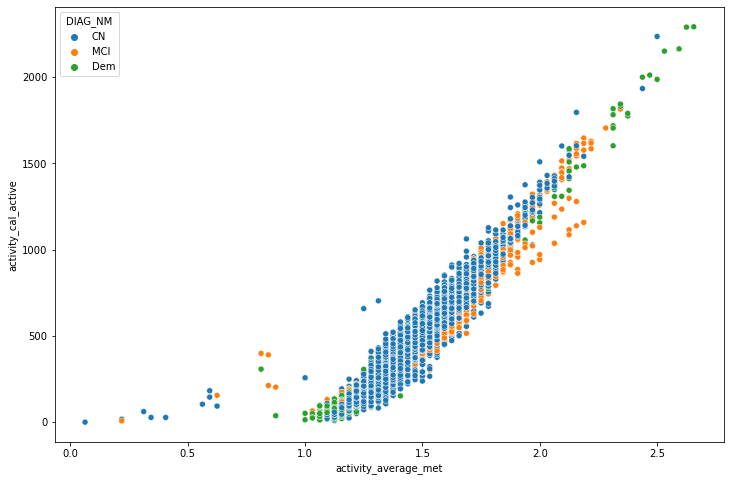

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train_merge[['DIAG_NM', 'activity_average_met', 'activity_cal_active']],
                x='activity_average_met',
                y='activity_cal_active',
                hue='DIAG_NM')

In [19]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaler.fit(train_merge.iloc[:, :-1].select_dtypes(["int64", "float64"]))
train_merge_scaled = scaler.transform(train_merge.iloc[:, :-1].select_dtypes(["int64", "float64"]))

train_merge_df_scaled = pd.DataFrame(data=train_merge_scaled, columns=train_merge.iloc[:, :-1].select_dtypes(["int64", "float64"]).columns)
train_merge_df_scaled['DIAG_NM'] = train_merge['DIAG_NM']


/Users/tedz/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/tedz/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,timezone,DIAG_NM
0,1.362785,1.012999,1.291009,1.079557,-0.434703,-0.758568,-0.610488,2.199650,-0.106003,-0.44138,-0.227496,2.412422,-0.034091,-0.221911,-1.066916,0.991575,0.634456,0.43474,0.482748,0.521475,0.610371,0.538862,0.906517,1.834994,2.348868,-0.222081,-1.149316,0.878223,-2.291919,1.399378,1.068569,0.0,0.046962,-0.288823,0.685171,0.403261,-0.807059,0.295295,0.904105,-0.829506,-0.969134,0.507242,-1.605171,-1.224905,-2.442794,1.163964,0.332321,-0.487428,-0.345686,-0.345686,0.0,NaN,CN
1,-0.298570,-0.441029,-0.132377,-0.443353,-0.434703,-0.353958,-0.610488,0.921095,-0.990967,-0.44138,0.065861,0.579823,-0.939394,-0.267618,0.024406,0.644779,0.117534,0.43474,0.482748,0.334545,0.610371,0.492402,-0.483909,0.455764,0.582648,0.464609,-1.021784,-0.639978,-1.396873,1.053459,1.219687,0.0,-0.591718,-0.043908,-0.848220,-0.021543,-0.807059,-0.616982,1.667503,-0.893888,-1.654162,0.507242,-1.287744,-1.773826,-1.476194,0.761479,-0.707810,-1.369928,-0.980243,-0.980243,0.0,NaN,CN
2,0.033701,-0.219926,0.140798,-0.263324,-0.434703,0.462486,-0.610488,0.670398,-0.627905,-0.44138,1.826004,0.489695,-0.593248,-0.572333,-0.595842,0.783498,0.634456,0.43474,0.482748,-0.413175,0.494248,0.445942,-0.383467,0.355196,1.765762,0.170313,-0.871063,0.564405,-1.956277,0.625179,0.615214,0.0,0.216823,-0.369602,0.732842,0.686464,-0.807059,-0.451113,0.988927,-0.443216,-1.054762,0.507242,-1.009996,-1.460157,-2.086678,0.627317,-0.506495,-0.487428,0.257143,0.257143,0.0,NaN,CN
3,-5.947180,-1.621489,-1.854819,-1.559912,-0.434703,-2.499835,-0.610488,-2.070557,-1.149806,-0.44138,-1.987639,-1.733458,-1.079183,-0.419975,5.300440,0.783498,0.634456,0.43474,0.482748,-0.226245,0.494248,0.260101,-0.421004,-2.166208,1.123500,0.366510,-1.276849,0.063992,-1.508754,0.461828,0.312978,0.0,0.345918,-0.253522,0.279975,0.733665,-0.807059,-0.810495,1.921969,-0.185690,-1.568533,0.507242,-1.843240,-2.009077,-1.577941,0.426075,-0.909126,-0.781595,-1.265793,-1.265793,0.0,NaN,CN
4,0.033701,-0.474756,0.066034,-0.536892,-0.434703,0.895997,-0.610488,0.795747,-1.036350,-0.44138,2.119361,0.489695,-0.972677,-0.419975,-1.121875,0.436702,0.634456,0.43474,0.482748,-0.787035,-0.231521,-0.297421,-0.548528,0.333645,1.436180,0.366510,-0.743531,0.309958,-1.732515,0.924426,0.766333,0.0,-0.184050,-0.331080,0.669281,4.179299,-0.807059,-0.077909,0.479994,-0.636361,-1.482905,0.507242,-0.692569,-0.832819,-1.832310,-4.403743,-0.070310,-0.634512,-0.821604,-0.821604,0.0,NaN,CN


<AxesSubplot:xlabel='column1', ylabel='column2'>

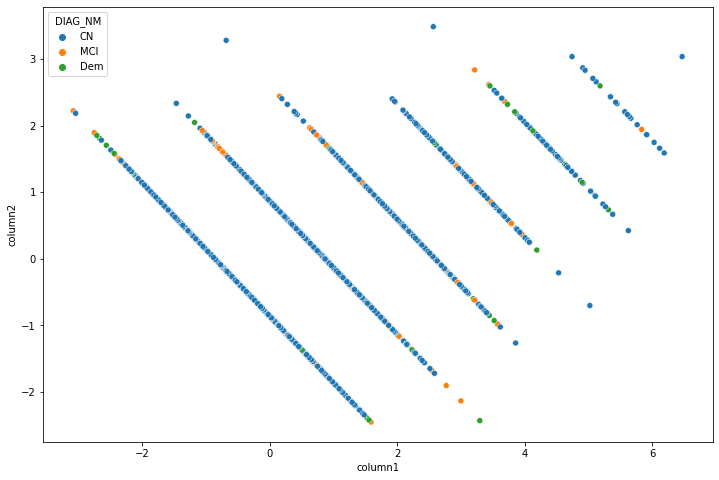

In [32]:
from sklearn.decomposition import PCA
plt.figure(figsize=(12, 8))
pca = PCA(n_components=2)

columns = ['activity_inactivity_alerts', 'activity_inactive']

pca.fit(train_merge_df_scaled[columns])
train_pca = pca.transform(train_merge_df_scaled[columns])

trainDF_pca = pd.DataFrame(train_pca, columns=['column1', 'column2'])
trainDF_pca['DIAG_NM'] = train_merge['DIAG_NM']

sns.scatterplot(data=trainDF_pca[['DIAG_NM', 'column1', 'column2']],
                x='column1',
                y='column2',
                hue='DIAG_NM')

In [37]:
train_merge.head()

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_1min,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,sleep_hr_lowest,sleep_hypnogram_5min,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_rmssd_5min,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,timezone,sleep_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8),CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8),DIAG_NM
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,...,14346,0,417,0,545,47,...,0,7,432,160,32,399,96,95,100,100,86,100,98,15867,592,13950,16.500,2100,35460,61,...,70.53,62,...,1,15030,6693,17280,960,0,4380,47,20,...,62,100,41,50,27,97,66,62,-0.12,-0.12,99.99,NaN,\r,2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...,0.9/0.9/1.4/1.9/1.1/0.9/0.9/1.1/1.3/1/0.9/1.1/...,0/73/73/73/72/71/70/71/71/71/70/70/73/72/74/74...,4/2/4/3/3/1/2/2/2/2/2/2/3/3/3/4/4/3/2/2/2/2/2/...,0/10/10/10/11/11/10/12/18/13/14/12/10/10/18/17...,CN
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,...,6352,0,473,0,392,8,...,0,8,249,24,29,538,91,78,100,100,83,100,97,7755,400,7680,17.375,2430,24720,69,...,68.01,63,...,1,12210,10495,11490,690,0,2400,56,19,...,54,100,49,43,46,91,35,44,-0.32,-0.32,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...,1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,69/70/69/69/70/72/71/72/70/69/69/69/68/68/63/6...,2/4/2/2/2/2/3/1/2/2/4/4/2/2/2/2/2/2/2/2/2/2/4/...,23/23/26/24/18/13/15/14/17/20/24/30/23/25/22/1...,CN
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,...,7297,0,586,0,362,24,...,0,14,240,76,9,459,93,95,100,100,71,96,96,8341,386,11880,17.000,2820,33240,64,...,64.89,59,...,1,15780,5439,17460,1140,0,2760,48,26,...,61,100,56,47,34,89,41,62,0.07,0.07,99.99,NaN,\r,1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...,1.1/1.1/1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/74/73/73/74/74/74/71/71/70/70/69/70/68/66/69...,4/2/4/4/1/1/1/4/4/4/4/4/4/4/2/3/4/2/2/4/2/2/2/...,0/11/14/20/13/14/14/16/27/29/27/20/19/19/14/12...,CN
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,...,491,0,176,0,34,1,...,0,1,18,3,19,1210,93,95,100,100,74,96,92,8122,35,9600,17.250,1770,29700,68,...,63.70,57,...,1,16350,7241,15750,1170,0,1980,59,30,...,55,100,35,40,44,86,29,56,-0.41,-0.41,99.99,NaN,\r,2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...,0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...,73/70/71/72/75/75/73/70/70/70/67/63/63/63/63/6...,4/4/4/4/3/3/3/2/4/4/4/2/2/2/2/2/2/2/2/4/2/2/2/...,24/28/19/17/12/10/17/20/23/23/25/31/26/25/34/3...,CN
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,...,5861,0,646,0,377,6,...,0,15,240,19,19,392,88,95,100,100,65,71,80,7378,383,10710,17.250,3150,31440,66,...,67.07,60,...,1,14010,6037,17220,3360,0,3570,42,23,...,56,100,64,55,39,14,54,59,-0.27,-0.27,99.99,NaN,\r,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....,0/0/0/0/0/0/0/0/69/69/71/69/65/66/64/64/65/66/...,4/4/4/4/4/4/4/4/4/4/4/2/2/2/2/3/3/2/4/4/4/2/2/...,0/0/0/0/0/0/0/0/21/22/26/23/19/29/22/17/14/13/...,CN


In [45]:
train_merge.columns

Index(['EMAIL', 'summary_date', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_class_5min', 'activity_daily_movement',
       'activity_high', 'activity_inactive', 'activity_inactivity_alerts',
       'activity_low', 'activity_medium', 'activity_met_1min',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_5min', 'sleep_hr_average',
       'sleep_hr_lowest', 'sleep_hypnogram_5min', 'sleep_is_longest',
       'sleep_light', 'sleep_midpoint_at_delta', 

In [67]:
n = 2
columns = list(train_merge.columns[2:n+3])
columns.append('DIAG_NM')
print(columns)

['activity_average_met', 'activity_cal_active', 'activity_cal_total', 'DIAG_NM']


In [77]:
import plotly.express as px

n = 6
columns = list(train_merge.columns[2:n+3])
columns.append('DIAG_NM')
fig = px.scatter_3d(train_merge[columns],
                    x=columns[0], 
                    y=columns[1], 
                    z=columns[2],
                    color=columns[-1])
fig.show()

In [6]:
train_label.groupby('DIAG_NM').count()

,SAMPLE_EMAIL
DIAG_NM,
CN,97
Dem,10
MCI,41


# 전처리

## Encoding

In [7]:
import numpy as np

def getStdev(lst):
    if '[' in lst:    
        lst = lst.replace('[', '').replace(']', '')
        return np.std(list(map(lambda y: float(y), 
                         list(filter(lambda x: len(x) > 0, 
                                     lst.split(','))))))

    return np.std(list(map(lambda y: float(y), 
                         list(filter(lambda x: len(x) > 0, 
                                     lst.split('/'))))))

def getMean(lst):
    if '[' in lst:    
        lst = lst.replace('[', '').replace(']', '')
        return np.mean(list(map(lambda y: float(y), 
                         list(filter(lambda x: len(x) > 0, 
                                     lst.split(','))))))

    return np.mean(list(map(lambda y: float(y), 
                         list(filter(lambda x: len(x) > 0, 
                                     lst.split('/'))))))

In [8]:
for column in train_merge.columns:
    if column.startswith('CONVERT') and column.endswith(')'):
        train_merge[column + "_stdev"] = train_merge[column].apply(getStdev)
        train_merge[column + "_mean"] = train_merge[column].apply(getMean)      
        test[column + "_stdev"] = test[column].apply(getStdev)
        test[column + "_mean"] = test[column].apply(getMean)  

## 불필요한 컬럼 제거

In [9]:
for c in train_merge.columns:
    if c.startswith('CONVERT') and c.endswith(')'):
        train_merge.drop(c, axis=1, inplace=True)
        test.drop(c, axis=1, inplace=True)
        
for c in train_merge.iloc[:, :-1].select_dtypes(["object"]).columns:
    if len(train_merge[c].unique()) <= 1:
        train_merge.drop(c, axis=1, inplace=True)
        test.drop(c, axis=1, inplace=True)

train_merge.drop('timezone', axis=1, inplace=True)
test.drop('timezone', axis=1, inplace=True)

In [10]:
train_merge = train_merge[['EMAIL', 'summary_date', 'activity_average_met', 'activity_cal_active',
       'activity_cal_total', 'activity_daily_movement', 'activity_high',
       'activity_inactive', 'activity_inactivity_alerts', 'activity_low',
       'activity_medium', 'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest',
       'sleep_is_longest', 'sleep_light', 'sleep_midpoint_at_delta',
       'sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_temperature_trend_deviation',
       'CONVERT(activity_class_5min USING utf8)_stdev',
       'CONVERT(activity_class_5min USING utf8)_mean',
       'CONVERT(activity_met_1min USING utf8)_stdev',
       'CONVERT(activity_met_1min USING utf8)_mean',
       'CONVERT(sleep_hr_5min USING utf8)_stdev',
       'CONVERT(sleep_hr_5min USING utf8)_mean',
       'CONVERT(sleep_hypnogram_5min USING utf8)_stdev',
       'CONVERT(sleep_hypnogram_5min USING utf8)_mean',
       'CONVERT(sleep_rmssd_5min USING utf8)_stdev',
       'CONVERT(sleep_rmssd_5min USING utf8)_mean', 'DIAG_NM']]

In [55]:
train_merge.head()

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean,DIAG_NM
0,nia+404@rowan.kr,2020-11-27,1.71875,730,2944,14346,0,417,0,545,47,0,7,432,160,32,399,96,95,100,100,86,100,98,15867,592,13950,16.500,2100,35460,61,70.53,62,1,15030,6693,17280,960,0,4380,47,20,62,100,41,50,27,97,66,62,-0.12,-0.12,99.99,0.960947,2.236111,0.973655,1.680208,19.796960,64.605042,1.006581,2.857143,8.881705,18.151261,CN
1,nia+404@rowan.kr,2020-11-28,1.40625,342,2449,6352,0,473,0,392,8,0,8,249,24,29,538,91,78,100,100,83,100,97,7755,400,7680,17.375,2430,24720,69,68.01,63,1,12210,10495,11490,690,0,2400,56,19,54,100,49,43,46,91,35,44,-0.32,-0.32,99.99,0.845741,1.916667,0.653991,1.386181,14.733033,64.734940,0.996292,2.566265,7.600567,19.879518,CN
2,nia+404@rowan.kr,2020-11-29,1.46875,401,2544,7297,0,586,0,362,24,0,14,240,76,9,459,93,95,100,100,71,96,96,8341,386,11880,17.000,2820,33240,64,64.89,59,1,15780,5439,17460,1140,0,2760,48,26,61,100,56,47,34,89,41,62,0.07,0.07,99.99,0.847613,2.017361,0.731056,1.459236,11.089713,63.135135,1.037954,2.639640,9.179840,23.900901,CN
3,nia+404@rowan.kr,2020-11-30,0.34375,27,1850,491,0,176,0,34,1,0,1,18,3,19,1210,93,95,100,100,74,96,92,8122,35,9600,17.250,1770,29700,68,63.70,57,1,16350,7241,15750,1170,0,1980,59,30,55,100,35,40,44,86,29,56,-0.41,-0.41,99.99,0.897682,1.899306,0.568965,0.317917,15.625799,59.880000,0.941943,2.595960,12.458487,28.690000,CN
4,nia+404@rowan.kr,2020-12-01,1.46875,333,2518,5861,0,646,0,377,6,0,15,240,19,19,392,88,95,100,100,65,71,80,7378,383,10710,17.250,3150,31440,66,67.07,60,1,14010,6037,17220,3360,0,3570,42,23,56,100,64,55,39,14,54,59,-0.27,-0.27,99.99,0.781242,2.027778,0.608517,1.443681,18.990471,61.323810,1.029717,2.666667,8.901701,21.485714,CN


In [11]:
test.head()

,EMAIL,summary_date,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,timezone,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean
0,nia+075@rowan.kr,2020-10-19,1.738393,627.0,2718.0,17125.461981,0.0,588.0,1,0.0,0.0,24.0,0.0,322.0,29.0,41.0,502.0,94.0,95,95,100,72.0,100,95.0,10563.892686,433.0,12738.0,15.998712,5666.0,33293.0,73.0,69.541010,61.0,1,11047.0,26128.0,21735.0,845.0,0,5977.0,56.0,29.0,75.0,100.0,41.0,55.0,75.0,94.0,55.0,99.0,-0.022292,-0.346215,99.99,NaN,0.987473,1.913194,0.967650,1.449306,15.625633,60.230769,0.999013,2.564103,8.976190,20.025641
1,nia+075@rowan.kr,2020-10-20,1.442223,137.0,2672.0,11410.099490,0.0,544.0,1,309.0,15.0,0.0,6.0,126.0,0.0,163.0,601.0,79.0,95,95,100,63.0,100,100.0,10232.788763,95.0,8735.0,13.051701,3690.0,27365.0,83.0,60.901762,52.0,1,6212.0,-9575.0,17630.0,1104.0,3,651.0,43.0,10.0,59.0,99.0,70.0,69.0,93.0,84.0,73.0,31.0,0.481816,0.019516,99.99,NaN,0.922932,1.826389,0.803619,1.357639,9.668393,57.233766,0.980771,2.342105,9.218053,22.038961
2,nia+075@rowan.kr,2020-10-21,1.479700,175.0,2514.0,5497.769969,2.0,559.0,2,236.0,68.0,11.0,12.0,64.0,154.0,14.0,439.0,65.0,78,78,100,56.0,96,82.0,3636.834219,132.0,10398.0,13.045471,4014.0,33174.0,72.0,43.534256,52.0,1,13934.0,-5974.0,18379.0,790.0,1,3925.0,38.0,33.0,97.0,88.0,89.0,49.0,78.0,99.0,36.0,86.0,-0.082092,0.022043,99.99,NaN,0.761098,1.975694,0.710660,1.408958,28.820587,35.186441,1.032682,2.618644,21.943022,22.144068
3,nia+075@rowan.kr,2020-10-22,1.069079,217.0,2653.0,3852.789155,0.0,671.0,0,212.0,4.0,48.0,6.0,52.0,0.0,171.0,709.0,92.0,95,100,100,55.0,96,76.0,11270.805738,298.0,4342.0,16.474520,2661.0,20640.0,83.0,64.184992,56.0,1,12222.0,-3392.0,9030.0,447.0,0,5369.0,56.0,19.0,81.0,83.0,95.0,74.0,88.0,51.0,100.0,36.0,0.177269,0.013762,99.99,NaN,0.958610,1.784722,0.816784,1.315000,16.264785,55.910256,0.975497,2.272727,10.930899,18.948718
4,nia+075@rowan.kr,2020-10-23,1.645156,16.0,2327.0,4483.044208,0.0,767.0,0,479.0,23.0,0.0,6.0,340.0,0.0,0.0,506.0,75.0,78,100,100,50.0,71,60.0,9850.318337,189.0,19337.0,16.299909,1484.0,48190.0,70.0,60.320205,48.0,1,7692.0,-12391.0,18857.0,237.0,0,3699.0,59.0,43.0,73.0,100.0,9.0,39.0,34.0,96.0,39.0,68.0,-0.037126,-0.110565,99.99,NaN,0.812760,1.871528,0.705246,1.365000,25.357690,45.804348,0.943217,2.970803,15.253250,21.652174


#    예측

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

dt_clf = DecisionTreeClassifier(max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(train_merge.iloc[:, 2:-1], train_merge.iloc[:, -1:], test_size=0.3, stratify=train_merge.iloc[:, -1:])

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

0.368436117871817


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

params = {'max_depth' : range(1, 20, 1)}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1_macro', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
0.6016022401521199
{'max_depth': 16}


## Randomforest

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_merge.iloc[:, 2:-1], train_merge.iloc[:, -1:], test_size=0.3, stratify=train_merge.iloc[:, -1:])

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

rcf = RandomForestClassifier()
rcf.fit(X_train, y_train)
pred = rcf.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

<ipython-input-41-c89095f7706f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rcf.fit(X_train, y_train)


0.7062192901816712


In [42]:
pred = rcf.predict(test.iloc[:, 2:])
test['pred'] = pred

ValueError: could not convert string to float: 'CN'

## Randomforest GridSearchCV

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train_merge.iloc[:, 2:-1], train_merge.iloc[:, -1:], test_size=0.3, stratify=train_merge.iloc[:, -1:])

# params = {
#     'n_estimators':list(range(100, 501, 100)),
#     'max_depth' : list(range(5, 21, 1)),
#     'min_samples_leaf':list(range(5, 30, 2)),
#     'min_samples_split':list(range(5, 30, 1))
# }
params = {
    'n_estimators':[100],
    'max_depth' : [16],
    'min_samples_leaf':[5],
    'min_samples_split':[5]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
0.6387590073106622


In [82]:
test.drop('pred', axis=1, inplace=True)

In [83]:
pred = grid_cv.predict(test.iloc[:, 2:])

In [84]:
test['pred'] = pred

## Scaling & Ramdomforest

In [87]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
scaler.fit(train_merge.iloc[:, :-1].select_dtypes(["int64", "float64"]))
train_merge_scaled = scaler.transform(train_merge.iloc[:, :-1].select_dtypes(["int64", "float64"]))

train_merge_df_scaled = pd.DataFrame(data=train_merge_scaled, columns=train_merge.iloc[:, :-1].select_dtypes(["int64", "float64"]).columns)
train_merge_df_scaled['DIAG_NM'] = train_merge['DIAG_NM']
train_merge_df_scaled.head()

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean,DIAG_NM
0,1.362785,1.012999,1.291009,1.079557,-0.434703,-0.758568,-0.610488,2.199650,-0.106003,-0.44138,-0.227496,2.412422,-0.034091,-0.221911,-1.066916,0.991575,0.634456,0.43474,0.482748,0.521475,0.610371,0.538862,0.906517,1.834994,2.348868,-0.222081,-1.149316,0.878223,-2.291919,1.399378,1.068569,0.0,0.046962,-0.288823,0.685171,0.403261,-0.807059,0.295295,0.904105,-0.829506,-0.969134,0.507242,-1.605171,-1.224905,-2.442794,1.163964,0.332321,-0.487428,-0.345686,-0.345686,0.0,0.308151,1.565579,0.318629,1.273387,0.401239,1.229591,0.747515,2.342525,-0.696490,-0.851886,CN
1,-0.298570,-0.441029,-0.132377,-0.443353,-0.434703,-0.353958,-0.610488,0.921095,-0.990967,-0.44138,0.065861,0.579823,-0.939394,-0.267618,0.024406,0.644779,0.117534,0.43474,0.482748,0.334545,0.610371,0.492402,-0.483909,0.455764,0.582648,0.464609,-1.021784,-0.639978,-1.396873,1.053459,1.219687,0.0,-0.591718,-0.043908,-0.848220,-0.021543,-0.807059,-0.616982,1.667503,-0.893888,-1.654162,0.507242,-1.287744,-1.773826,-1.476194,0.761479,-0.707810,-1.369928,-0.980243,-0.980243,0.0,-0.497287,0.053336,-0.784506,-0.199345,-0.355723,1.244212,0.661624,1.148704,-0.843164,-0.716116,CN
2,0.033701,-0.219926,0.140798,-0.263324,-0.434703,0.462486,-0.610488,0.670398,-0.627905,-0.44138,1.826004,0.489695,-0.593248,-0.572333,-0.595842,0.783498,0.634456,0.43474,0.482748,-0.413175,0.494248,0.445942,-0.383467,0.355196,1.765762,0.170313,-0.871063,0.564405,-1.956277,0.625179,0.615214,0.0,0.216823,-0.369602,0.732842,0.686464,-0.807059,-0.451113,0.988927,-0.443216,-1.054762,0.507242,-1.009996,-1.460157,-2.086678,0.627317,-0.506495,-0.487428,0.257143,0.257143,0.0,-0.484196,0.530021,-0.518563,0.166577,-0.900330,1.064131,1.009399,1.449848,-0.662358,-0.400201,CN
3,-5.947180,-1.621489,-1.854819,-1.559912,-0.434703,-2.499835,-0.610488,-2.070557,-1.149806,-0.44138,-1.987639,-1.733458,-1.079183,-0.419975,5.300440,0.783498,0.634456,0.43474,0.482748,-0.226245,0.494248,0.260101,-0.421004,-2.166208,1.123500,0.366510,-1.276849,0.063992,-1.508754,0.461828,0.312978,0.0,0.345918,-0.253522,0.279975,0.733665,-0.807059,-0.810495,1.921969,-0.185690,-1.568533,0.507242,-1.843240,-2.009077,-1.577941,0.426075,-0.909126,-0.781595,-1.265793,-1.265793,0.0,-0.134152,-0.028851,-1.077928,-5.550085,-0.222271,0.697720,0.207946,1.270576,-0.286996,-0.023975,CN
4,0.033701,-0.474756,0.066034,-0.536892,-0.434703,0.895997,-0.610488,0.795747,-1.036350,-0.44138,2.119361,0.489695,-0.972677,-0.419975,-1.121875,0.436702,0.634456,0.43474,0.482748,-0.787035,-0.231521,-0.297421,-0.548528,0.333645,1.436180,0.

In [88]:
train_merge_df_scaled = train_merge_df_scaled[['activity_average_met', 'activity_cal_active', 'activity_cal_total',
       'activity_daily_movement', 'activity_high', 'activity_inactive',
       'activity_inactivity_alerts', 'activity_low', 'activity_medium',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total',
       'sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest',
       'sleep_is_longest', 'sleep_light', 'sleep_midpoint_at_delta',
       'sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_temperature_trend_deviation',
       'CONVERT(activity_class_5min USING utf8)_stdev',
       'CONVERT(activity_class_5min USING utf8)_mean',
       'CONVERT(activity_met_1min USING utf8)_stdev',
       'CONVERT(activity_met_1min USING utf8)_mean',
       'CONVERT(sleep_hr_5min USING utf8)_stdev',
       'CONVERT(sleep_hr_5min USING utf8)_mean',
       'CONVERT(sleep_hypnogram_5min USING utf8)_stdev',
       'CONVERT(sleep_hypnogram_5min USING utf8)_mean',
       'CONVERT(sleep_rmssd_5min USING utf8)_stdev',
       'CONVERT(sleep_rmssd_5min USING utf8)_mean', 'DIAG_NM']]

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_merge_df_scaled.iloc[:, :-1], train_merge_df_scaled.iloc[:, -1:], test_size=0.2, stratify=train_merge_df_scaled.iloc[:, -1:])

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

rcf = RandomForestClassifier()
rcf.fit(X_train, y_train)
pred = rcf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

<ipython-input-90-19592302e59f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rcf.fit(X_train, y_train)


0.807609860664523


In [91]:
X_test["pred"] = pred
X_test.head()

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean,pred
2708,-1.129248,-1.059365,-0.917397,-1.054117,-0.294768,0.845420,0.611142,-1.569163,-0.582522,-0.250633,-0.520853,-1.352918,-0.599905,1.819679,-0.164023,-1.852151,-2.223819,-0.053522,0.482748,-0.849345,-2.263674,-0.529722,-1.104390,-1.548428,-0.135671,-0.320180,-0.685561,0.386292,0.281339,-0.201183,-0.140376,0.0,0.400274,-0.273040,0.462711,0.403261,0.117915,1.484020,-1.216447,-0.636361,0.914692,0.507242,-0.613212,0.421857,0.304386,1.163964,1.338900,0.591182,0.003320,0.003320,0.0,-0.339920,-1.656157,-0.512764,-1.510334,-0.816143,0.336714,-0.803893,0.550704,-0.958324,-0.618548,CN
5435,1.861192,1.931135,1.774098,1.850156,-0.014898,1.257255,1.832772,-0.449382,2.730421,0.003695,-0.520853,-0.321455,2.994678,-0.267618,-1.749974,0.228624,0.786492,-1.713613,-0.255558,-1.098585,0.610371,0.631782,2.192558,0.477315,0.531943,-1.399264,-0.813094,-0.707830,-1.396873,0.137872,-0.895967,0.0,-1.114892,-0.354593,-0.331793,0.544863,1.042889,0.060315,0.140706,0.973179,-1.226019,0.507242,-0.851282,-0.675984,-1.476194,0.761479,0.063900,-1.418955,-0.060136,-0.060136,0.0,0.582155,1.450517,1.813019,1.793052,1.311909,-0.586736,0.809449,1.662111,2.815562,1.006125,CN
2519,0.698243,0.372177,-0.210017,0.627104,0.964647,-0.628515,-0.610488,0.870956,0.937801,0.787873,-0.227496,0.349496,0.445187,-0.115260,-0.454519,1.130294,0.786492,0.434740,0.415629,0.957645,0.610371,0.585322,0.710088,1.095095,-1.420195,0.660806,-0.360933,-1.861324,1.623909,0.435747,0.917451,0.0,-1.094509,-0.776011,-1.793678,-0.823951,-0.807059,-1.086942,-0.707514,-1.022651,-0.284106,0.077284,0.616816,2.382289,1.270986,-0.848460,-0.909126,-1.075761,0.606149,0.606149,0.0,0.639566,0.858770,0.495544,0.661546,-1.256157,0.973877,-1.347249,-1.403372,-1.366942,-0.993246,CN
9258,0.199836,0.417147,0.356463,0.366681,-0.294768,-0.693541,-0.610488,-0.098406,0.620122,-0.293021,-0.814210,-0.231327,0.831272,1.179777,0.040109,0.714139,0.786492,0.434740,-0.255558,0.833025,0.610371,0.631782,0.494977,0.096590,-0.617368,0.758904,-0.105868,-1.318503,0.169459,-0.659663,-0.593730,0.0,-1.026564,-0.267694,-1.086570,0.120058,0.117915,-1.073120,-0.368226,0.780034,-0.797877,0.507242,0.537459,0.186606,0.202638,0.962721,-1.177547,-1.467983,0.637877,0.637877,0.0,1.751027,-0.209663,0.794007,-0.095342,0.425122,-0.725228,0.312967,-0.685307,0.491878,0.717960,CN
1477,-0.132435,-0.051289,-0.060489,-0.051290,0.264972,-0.996999,-0.610488,-0.432669,-0.083311,0.406381,-1.107567,-0.301427,-0.027434,3.632732,-0.368156,1.130294,0.634456,0.434740,0.482748,1.144575,0.610371,0.585322,-0.304107,-0.384703,1

In [92]:
for i in X_test.index:
    X_test.loc[i, "EMAIL"] = train_merge.loc[i, "EMAIL"]
X_test.head()

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean,pred,EMAIL
2708,-1.129248,-1.059365,-0.917397,-1.054117,-0.294768,0.845420,0.611142,-1.569163,-0.582522,-0.250633,-0.520853,-1.352918,-0.599905,1.819679,-0.164023,-1.852151,-2.223819,-0.053522,0.482748,-0.849345,-2.263674,-0.529722,-1.104390,-1.548428,-0.135671,-0.320180,-0.685561,0.386292,0.281339,-0.201183,-0.140376,0.0,0.400274,-0.273040,0.462711,0.403261,0.117915,1.484020,-1.216447,-0.636361,0.914692,0.507242,-0.613212,0.421857,0.304386,1.163964,1.338900,0.591182,0.003320,0.003320,0.0,-0.339920,-1.656157,-0.512764,-1.510334,-0.816143,0.336714,-0.803893,0.550704,-0.958324,-0.618548,CN,nia+380@rowan.kr
5435,1.861192,1.931135,1.774098,1.850156,-0.014898,1.257255,1.832772,-0.449382,2.730421,0.003695,-0.520853,-0.321455,2.994678,-0.267618,-1.749974,0.228624,0.786492,-1.713613,-0.255558,-1.098585,0.610371,0.631782,2.192558,0.477315,0.531943,-1.399264,-0.813094,-0.707830,-1.396873,0.137872,-0.895967,0.0,-1.114892,-0.354593,-0.331793,0.544863,1.042889,0.060315,0.140706,0.973179,-1.226019,0.507242,-0.851282,-0.675984,-1.476194,0.761479,0.063900,-1.418955,-0.060136,-0.060136,0.0,0.582155,1.450517,1.813019,1.793052,1.311909,-0.586736,0.809449,1.662111,2.815562,1.006125,CN,nia+353@rowan.kr
2519,0.698243,0.372177,-0.210017,0.627104,0.964647,-0.628515,-0.610488,0.870956,0.937801,0.787873,-0.227496,0.349496,0.445187,-0.115260,-0.454519,1.130294,0.786492,0.434740,0.415629,0.957645,0.610371,0.585322,0.710088,1.095095,-1.420195,0.660806,-0.360933,-1.861324,1.623909,0.435747,0.917451,0.0,-1.094509,-0.776011,-1.793678,-0.823951,-0.807059,-1.086942,-0.707514,-1.022651,-0.284106,0.077284,0.616816,2.382289,1.270986,-0.848460,-0.909126,-1.075761,0.606149,0.606149,0.0,0.639566,0.858770,0.495544,0.661546,-1.256157,0.973877,-1.347249,-1.403372,-1.366942,-0.993246,CN,nia+445@rowan.kr
9258,0.199836,0.417147,0.356463,0.366681,-0.294768,-0.693541,-0.610488,-0.098406,0.620122,-0.293021,-0.814210,-0.231327,0.831272,1.179777,0.040109,0.714139,0.786492,0.434740,-0.255558,0.833025,0.610371,0.631782,0.494977,0.096590,-0.617368,0.758904,-0.105868,-1.318503,0.169459,-0.659663,-0.593730,0.0,-1.026564,-0.267694,-1.086570,0.120058,0.117915,-1.073120,-0.368226,0.780034,-0.797877,0.507242,0.537459,0.186606,0.202638,0.962721,-1.177547,-1.467983,0.637877,0.637877,0.0,1.751027,-0.209663,0.794007,-0.095342,0.425122,-0.725228,0.312967,-0.685307,0.491878,0.717960,CN,nia+280@rowan.kr
1477,-0.132435,-0.051289,-0.060489,-0.051290,0.264972,-0.996999,-0.610488,-0.432669,-0.083311,0.406381,-1.107567,-0.301427,-0.027434,3.632732,-0.368156,1.130294,0

In [93]:
train_merge_df_scaled["EMAIL"] = train_merge["EMAIL"]
train_merge_df_scaled.head()

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean,DIAG_NM,EMAIL
0,1.362785,1.012999,1.291009,1.079557,-0.434703,-0.758568,-0.610488,2.199650,-0.106003,-0.44138,-0.227496,2.412422,-0.034091,-0.221911,-1.066916,0.991575,0.634456,0.43474,0.482748,0.521475,0.610371,0.538862,0.906517,1.834994,2.348868,-0.222081,-1.149316,0.878223,-2.291919,1.399378,1.068569,0.0,0.046962,-0.288823,0.685171,0.403261,-0.807059,0.295295,0.904105,-0.829506,-0.969134,0.507242,-1.605171,-1.224905,-2.442794,1.163964,0.332321,-0.487428,-0.345686,-0.345686,0.0,0.308151,1.565579,0.318629,1.273387,0.401239,1.229591,0.747515,2.342525,-0.696490,-0.851886,CN,nia+404@rowan.kr
1,-0.298570,-0.441029,-0.132377,-0.443353,-0.434703,-0.353958,-0.610488,0.921095,-0.990967,-0.44138,0.065861,0.579823,-0.939394,-0.267618,0.024406,0.644779,0.117534,0.43474,0.482748,0.334545,0.610371,0.492402,-0.483909,0.455764,0.582648,0.464609,-1.021784,-0.639978,-1.396873,1.053459,1.219687,0.0,-0.591718,-0.043908,-0.848220,-0.021543,-0.807059,-0.616982,1.667503,-0.893888,-1.654162,0.507242,-1.287744,-1.773826,-1.476194,0.761479,-0.707810,-1.369928,-0.980243,-0.980243,0.0,-0.497287,0.053336,-0.784506,-0.199345,-0.355723,1.244212,0.661624,1.148704,-0.843164,-0.716116,CN,nia+404@rowan.kr
2,0.033701,-0.219926,0.140798,-0.263324,-0.434703,0.462486,-0.610488,0.670398,-0.627905,-0.44138,1.826004,0.489695,-0.593248,-0.572333,-0.595842,0.783498,0.634456,0.43474,0.482748,-0.413175,0.494248,0.445942,-0.383467,0.355196,1.765762,0.170313,-0.871063,0.564405,-1.956277,0.625179,0.615214,0.0,0.216823,-0.369602,0.732842,0.686464,-0.807059,-0.451113,0.988927,-0.443216,-1.054762,0.507242,-1.009996,-1.460157,-2.086678,0.627317,-0.506495,-0.487428,0.257143,0.257143,0.0,-0.484196,0.530021,-0.518563,0.166577,-0.900330,1.064131,1.009399,1.449848,-0.662358,-0.400201,CN,nia+404@rowan.kr
3,-5.947180,-1.621489,-1.854819,-1.559912,-0.434703,-2.499835,-0.610488,-2.070557,-1.149806,-0.44138,-1.987639,-1.733458,-1.079183,-0.419975,5.300440,0.783498,0.634456,0.43474,0.482748,-0.226245,0.494248,0.260101,-0.421004,-2.166208,1.123500,0.366510,-1.276849,0.063992,-1.508754,0.461828,0.312978,0.0,0.345918,-0.253522,0.279975,0.733665,-0.807059,-0.810495,1.921969,-0.185690,-1.568533,0.507242,-1.843240,-2.009077,-1.577941,0.426075,-0.909126,-0.781595,-1.265793,-1.265793,0.0,-0.134152,-0.028851,-1.077928,-5.550085,-0.222271,0.697720,0.207946,1.270576,-0.286996,-0.023975,CN,nia+404@rowan.kr
4,0.033701,-0.474756,0.066034,-0.536892,-0.434703,0.895997,-0.610488,0.795747,-1.036350,-0.44138,2.119361,0.489695,-0.972677,-0.419975,-1.121875,0.436702,0.634456,0.4

In [94]:
df_count = pd.DataFrame(X_test[["EMAIL", "pred"]].value_counts(), columns=["count"]).sort_values(by="count", ascending=False)
df_count = df_count.reset_index()
df_count.head()

,EMAIL,pred,count
0,nia+106@rowan.kr,MCI,23
1,nia+318@rowan.kr,CN,22
2,nia+172@rowan.kr,CN,21
3,nia+269@rowan.kr,CN,21
4,nia+280@rowan.kr,CN,21


In [95]:
for i in train_label.index:
    if (df_count["EMAIL"] == train_label.loc[i, 'SAMPLE_EMAIL']).sum() > 0:
#         print(df_count[df_count["EMAIL"] == train_label.loc[i]['SAMPLE_EMAIL']]['pred'].values[0])
        train_label.loc[i, "pred"] = df_count[df_count["EMAIL"] == train_label.loc[i]['SAMPLE_EMAIL']]['pred'].values[0]

In [96]:
test_scaled = scaler.transform(test.select_dtypes(["int64", "float64"]))
test_df_scaled = pd.DataFrame(data=test_scaled, columns=test.select_dtypes(["int64", "float64"]).columns)

In [97]:
pred = rcf.predict(test_df_scaled)
test['pred'] = pred

## Randomforest by Summary 

In [122]:
train_summary = train_merge.groupby('EMAIL')[train_merge.select_dtypes(["int64", "float64"]).columns].mean().reset_index()
train_summary_merge = pd.merge(train_summary, train_label, left_on='EMAIL', right_on='SAMPLE_EMAIL')
train_summary_merge.drop('SAMPLE_EMAIL', axis=1, inplace=True)
train_summary_merge.head()

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean,DIAG_NM
0,nia+003@rowan.kr,1.263105,204.338710,2209.596774,3693.693548,0.806452,612.967742,0.822581,146.935484,18.596774,6.080645,6.193548,95.467742,60.048387,37.612903,623.080645,58.887097,19.080645,92.370968,99.693548,66.564516,22.016129,53.516129,4556.758065,166.338710,7139.032258,16.459677,4319.032258,30755.806452,77.258065,58.026290,52.209677,1.0,15521.612903,14983.177419,15334.354839,708.387097,2.032258,3776.129032,39.967742,27.790323,68.112903,74.500000,75.645161,57.870968,65.564516,78.532258,55.258065,70.016129,0.022097,0.022097,99.99,0.743741,1.689348,0.610746,1.232046,21.479239,46.998131,0.943028,2.384625,14.384796,22.209201,MCI
1,nia+005@rowan.kr,1.364338,215.870588,1799.894118,4949.023529,0.094118,575.188235,0.611765,278.529412,14.235294,0.635294,11.482353,174.858824,46.541176,50.564706,521.388235,54.929412,14.188235,94.776471,97.564706,72.082353,6.976471,42.494118,6303.035294,292.858824,1964.823529,16.279412,6213.529412,30123.529412,93.400000,65.240706,57.741176,1.0,16334.117647,10994.564706,15113.294118,623.647059,0.576471,5611.058824,29.258824,50.470588,84.752941,87.870588,89.223529,84.000000,98.023529,84.094118,74.988235,82.035294,0.085882,0.085882,99.99,0.823813,1.812786,0.658630,1.325394,10.474006,63.551625,0.776588,2.091113,16.402927,49.348358,CN
2,nia+010@rowan.kr,1.390024,263.115385,2404.230769,3893.250000,0.557692,640.903846,0.365385,325.750000,7.865385,4.038462,14.576923,172.019231,25.423077,34.865385,430.057692,65.403846,56.307692,97.019231,99.846154,63.865385,13.000000,39.326923,5814.942308,334.173077,6903.461538,16.853365,2995.961538,26890.384615,74.692308,53.168269,47.057692,1.0,12666.346154,5611.346154,13310.769231,801.346154,0.480769,4324.615385,33.826923,33.884615,65.076923,97.692308,58.923077,63.769231,59.442308,79.019231,63.557692,56.096154,-0.045385,-0.045385,99.99,0.816667,1.965278,0.570318,1.363349,14.585542,48.235985,0.957863,2.525063,13.597219,30.847139,MCI
3,nia+013@rowan.kr,1.480175,498.376344,2581.860215,8869.139785,0.720430,469.967742,0.709677,316.483871,49.118280,5.053763,7.731183,205.924731,190.548387,41.913978,561.795699,91.387097,88.623656,93.956989,92.440860,83.064516,99.215054,98.225806,10896.752688,366.322581,3363.225806,17.104839,7600.967742,26532.258065,87.451613,50.784516,47.139785,1.0,12925.806452,11498.698925,13546.451613,865.483871,0.741935,2642.258065,25.516129,34.860215,74.935484,89.387097,97.784946,73.408602,88.526882,82.225806,39.279570,69.075269,-0.011828,-0.011828,99.99,0.984929,1.935335,0.941136,1.447901,10.735555,48.073483,0.89895

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_summary_merge.iloc[:, 1:-1], train_summary_merge.iloc[:, -1:], test_size=0.2, stratify=train_summary_merge.iloc[:, -1:])

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

rcf = RandomForestClassifier()
rcf.fit(X_train, y_train)
pred = rcf.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

0.24113475177304966


<ipython-input-128-c89095f7706f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rcf.fit(X_train, y_train)


In [131]:
X_test['DIAG_NM'] = y_test
X_test['pred'] = pred
X_test.head(100)

,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,activity_met_min_high,activity_met_min_inactive,activity_met_min_low,activity_met_min_medium,activity_non_wear,activity_rest,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_is_longest,sleep_light,sleep_midpoint_at_delta,sleep_midpoint_time,sleep_onset_latency,sleep_period_id,sleep_rem,sleep_restless,sleep_rmssd,sleep_score,sleep_score_alignment,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_temperature_trend_deviation,CONVERT(activity_class_5min USING utf8)_stdev,CONVERT(activity_class_5min USING utf8)_mean,CONVERT(activity_met_1min USING utf8)_stdev,CONVERT(activity_met_1min USING utf8)_mean,CONVERT(sleep_hr_5min USING utf8)_stdev,CONVERT(sleep_hr_5min USING utf8)_mean,CONVERT(sleep_hypnogram_5min USING utf8)_stdev,CONVERT(sleep_hypnogram_5min USING utf8)_mean,CONVERT(sleep_rmssd_5min USING utf8)_stdev,CONVERT(sleep_rmssd_5min USING utf8)_mean,DIAG_NM,pred
44,1.289732,252.200000,2271.657143,4346.928571,0.014286,509.000000,0.114286,211.128571,24.471429,0.100000,8.985714,120.600000,77.314286,39.471429,655.914286,76.471429,51.385714,99.257143,98.271429,80.400000,62.628571,74.000000,6215.242857,235.614286,5700.000000,17.328571,5896.714286,32238.000000,83.314286,64.585857,59.242857,1.0,18042.857143,12438.785714,15955.714286,400.285714,1.400000,2598.428571,48.014286,35.171429,73.871429,88.914286,91.500000,60.857143,79.385714,77.057143,38.414286,77.814286,-0.011714,-0.011714,99.99,0.845166,1.739087,0.637850,1.258375,19.346491,57.578535,0.908850,2.192047,19.435307,32.444237,MCI,CN
89,1.436012,487.587302,2514.857143,9264.365079,8.333333,442.476190,0.126984,251.507937,43.603175,62.857143,4.666667,191.380952,141.587302,76.888889,617.190476,92.190476,87.777778,99.365079,91.523810,86.158730,99.936508,98.809524,9814.333333,303.444444,8681.904762,16.886905,4985.714286,31617.142857,73.444444,55.025079,49.555556,1.0,14943.809524,13697.015873,16054.761905,770.476190,0.746032,3005.714286,43.603175,31.126984,69.809524,97.285714,86.349206,62.047619,56.539683,81.650794,44.492063,68.000000,0.018889,0.018889,99.99,0.972704,1.791667,1.049786,1.375309,22.920949,41.584146,1.026876,2.437887,20.207734,24.165745,MCI,CN
73,1.376803,315.346154,2379.346154,5959.750000,0.019231,679.038462,0.961538,199.076923,33.423077,0.134615,7.980769,148.076923,102.807692,71.442308,457.000000,86.076923,84.346154,92.153846,97.173077,61.557692,89.846154,89.653846,7560.096154,232.519231,5194.038462,15.552885,5893.269231,22809.230769,77.961538,51.313846,47.961538,1.0,10300.384615,160.307692,11120.769231,724.038462,0.403846,1421.538462,38.596154,38.057692,59.519231,83.519231,92.826923,59.326923,67.307692,78.846154,20.923077,46.403846,-0.045769,-0.045769,99.99,0.853815,1.830128,0.731931,1.321719,19.462177,41.012681,1.019750,2.185680,20.321166,30.279611,CN,CN
74,1.430176,531.171875,2523.843750,9838.296875,0.953125,437.328125,0.453125,190.390625,75.718750,6.750000,3.437500,131.265625,294.781250,22.703125,712.906250,81.453125,98.812500,96.593750,40.375000,87.062500,99.812500,99.796875,12129.437500,267.062500,9080.625000,13.714844,5768.906250,36010.312500,75.984375,38.977969,36.140625,1.0,17844.843750,39890.312500,18039.843750,971.250000,0.640625,3315.937500,31.000000,58.406250,75.000000,87.750000,85.265625,72.078125,63.578125,79.359375,48.718750,79.093750,-0.039062,-0.039062,99.99,1.050549,1.830132,1.102568,1.412666,15.117268,30.177804,0.990805,2.383769,27.493534,44.676153,CN,CN
139,1.644817,7

## XGBClassifier

In [107]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(train_merge.iloc[:, 2:-1], train_merge.iloc[:, -1:], test_size=0.3, stratify=train_merge.iloc[:, -1:])

In [114]:
from xgboost import XGBRFClassifier
from sklearn.metrics import f1_score

xgb_wrapper = XGBRFClassifier(n_estimators=400, learning_rate=0.1, max_depth=16)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
print('depth :', d, 'f1_score :', f1_score(y_test, w_preds, average='macro'))

[23:25:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
depth : 16 f1_score : 0.782369577487502


In [110]:
test.drop('pred', axis=1, inplace=True)

In [16]:
pred = xgb_wrapper.predict(test.iloc[:, 2:])

In [17]:
test['pred'] = pred

## Voting

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn_clf = KNeighborsClassifier(n_neighbors=8)
rfc_clf = RandomForestClassifier()

vo_clf = VotingClassifier(estimators=[('KNN', knn_clf), ('RF', rfc_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(train_merge.iloc[:, 2:-1], train_merge.iloc[:, -1:], test_size=0.3, stratify=train_merge.iloc[:, -1:])

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

# grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1_macro', cv=5, verbose=1)
# grid_cv.fit(X_train, y_train)
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

0.6540385719915286


In [62]:
if 'pred' in test.columns:
    test.drop('pred', axis=1, inplace=True)
pred = vo_clf.predict(test.iloc[:, 2:])

# Submission

In [63]:
test['pred'] = pred

In [85]:
df_count = pd.DataFrame(test[["EMAIL", "pred"]].groupby(["EMAIL", "pred"])['pred'].count())
df_count.columns = ['count']
df_count = df_count.reset_index()
df_count = df_count.sort_values(by='count', ascending=False).groupby('EMAIL').head(1)
df_count.head()

,EMAIL,pred,count
66,nia+058@rowan.kr,CN,94
701,nia+562@rowan.kr,CN,93
105,nia+095@rowan.kr,CN,93
290,nia+254@rowan.kr,CN,92
727,nia+576@rowan.kr,CN,92


In [86]:
for i in submission.index:
    submission.loc[i, 'DIAG_NM'] = df_count[df_count['EMAIL'] == submission.loc[i]['ID']]['pred'].values[0]

In [87]:
submission.to_csv('submission.csv', index=False)